pro5

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
data = pd.read_csv('data.csv')
print(data.head())
X = data.drop('target', axis=1)  # Replace 'target' with the name of your target column
y = data['target']  # Replace 'target' with the name of your target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


   feature1  feature2  feature3  target
0       5.1       3.5       1.4       0
1       4.9       3.0       1.4       0
2       4.7       3.2       1.3       0
3       4.6       3.1       1.5       0
4       5.0       3.6       1.4       0
Accuracy: 60.00%


p6

In [2]:
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

# Step 1: Define the structure of the network
model = BayesianNetwork([('Rain', 'WetGrass'), ('Sprinkler', 'WetGrass'), ('Rain', 'Sprinkler')])

# Step 2: Define the CPDs
cpd_rain = TabularCPD(variable='Rain', variable_card=2, values=[[0.7], [0.3]])
cpd_sprinkler = TabularCPD(variable='Sprinkler', variable_card=2,
                           values=[[0.5, 0.9], [0.5, 0.1]],
                           evidence=['Rain'], evidence_card=[2])
cpd_wet_grass = TabularCPD(variable='WetGrass', variable_card=2,
                           values=[[0.99, 0.9, 0.8, 0.0], 
                                   [0.01, 0.1, 0.2, 1.0]],
                           evidence=['Sprinkler', 'Rain'], evidence_card=[2, 2])

# Add the CPDs to the model
model.add_cpds(cpd_rain, cpd_sprinkler, cpd_wet_grass)

# Step 3: Check if the model is valid
assert model.check_model()

# Step 4: Perform inference
infer = VariableElimination(model)

# Query the probability of Wet Grass being True given that Rain is True
prob_wet_grass_given_rain = infer.query(variables=['WetGrass'], evidence={'Rain': 1})
print("P(WetGrass | Rain):")
print(prob_wet_grass_given_rain)

# Query the probability of Rain being True given that Wet Grass is True
prob_rain_given_wet_grass = infer.query(variables=['Rain'], evidence={'WetGrass': 1})
print("P(Rain | WetGrass):")
print(prob_rain_given_wet_grass)


P(WetGrass | Rain):
+-------------+-----------------+
| WetGrass    |   phi(WetGrass) |
+=============+=================+
| WetGrass(0) |          0.8100 |
+-------------+-----------------+
| WetGrass(1) |          0.1900 |
+-------------+-----------------+
P(Rain | WetGrass):
+---------+-------------+
| Rain    |   phi(Rain) |
+=========+=============+
| Rain(0) |      0.5632 |
+---------+-------------+
| Rain(1) |      0.4368 |
+---------+-------------+


p7

/Users/jeevanhr/Library/Python/3.11/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'GMM Classification')

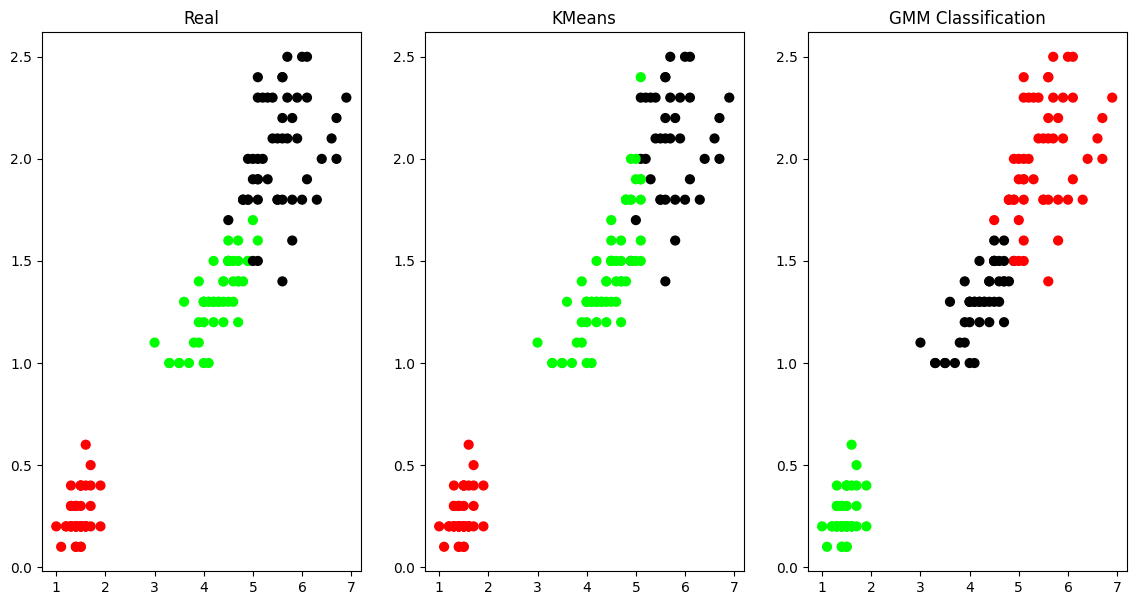

In [3]:
# K- Means Clustering

from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
# import sklearn.metrics as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset=load_iris()
# print(dataset)

X=pd.DataFrame(dataset.data) # Extract data from dataset
X.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width'] # concepts 
y=pd.DataFrame(dataset.target)
y.columns=['Targets'] # target funciton 
# print(X)

plt.figure(figsize=(14,7)) # size of the plot
colormap=np.array(['red','lime','black']) # colors to plot

# REAL PLOT
plt.subplot(1,3,1) # index in the row of plot (rows, columns, index)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets],s=40) # Scatter plot 
plt.title('Real')

# K-PLOT
plt.subplot(1,3,2)
model=KMeans(n_clusters=3)
model.fit(X)
predY=np.choose(model.labels_,[0,1,2]).astype(np.int64)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[predY],s=40)
plt.title('KMeans')

# GMM PLOT
scaler=preprocessing.StandardScaler()
xsa=scaler.fit_transform(X)
xs=pd.DataFrame(xsa,columns=X.columns)

gmm=GaussianMixture(n_components=3)
gmm.fit(xs)
y_cluster_gmm=gmm.predict(xs)
plt.subplot(1,3,3)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_cluster_gmm],s=40)
plt.title('GMM Classification')



p8

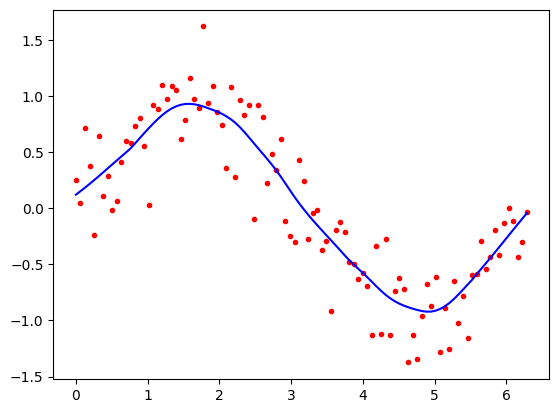

In [4]:
from math import ceil
import numpy as np
from scipy import linalg
def lowess(x, y, f, iterations):
    n = len(x)
    r = int(ceil(f * n))
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
    w = (1 - w ** 3) ** 3
    yest = np.zeros(n)
    delta = np.ones(n)
    for iteration in range(iterations):
        for i in range(n):
            weights = delta * w[:, i]
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
            A = np.array([[np.sum(weights), np.sum(weights * x)],[np.sum(weights * x), np.sum(weights * x * x)]])
            beta = linalg.solve(A, b)
            yest[i] = beta[0] + beta[1] * x[i]

        residuals = y - yest
        s = np.median(np.abs(residuals))
        delta = np.clip(residuals / (6.0 * s), -1, 1)
        delta = (1 - delta ** 2) ** 2

    return yest
import math
n = 100
x = np.linspace(0, 2 * math.pi, n)
y = np.sin(x) + 0.3 * np.random.randn(n)
f =0.25
iterations=3
yest = lowess(x, y, f, iterations)
    
import matplotlib.pyplot as plt
plt.plot(x,y,"r.")
plt.plot(x,yest,"b-")


p10

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Accuracy Score:
1.0


/Users/jeevanhr/Library/Python/3.11/lib/python/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


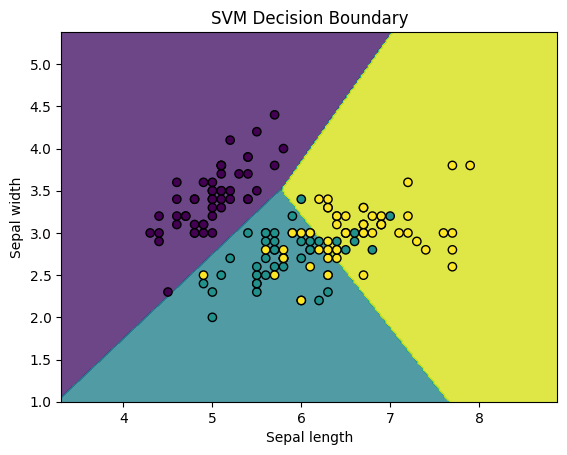

In [5]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Split the data
X = data.drop(columns=['target'])
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the SVM model
svm_model = SVC(kernel='linear')  # You can also use 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Visualization using only the first two features
X_vis = X.iloc[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.3, random_state=42)
svm_model_vis = SVC(kernel='linear')
svm_model_vis.fit(X_train_vis, y_train_vis)

def plot_decision_boundary(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', marker='o')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('SVM Decision Boundary')
    plt.show()

plot_decision_boundary(X_vis, y, svm_model_vis)